In [1]:
! install_name_tool -add_rpath @executable_path/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb   ml_venv/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin

In [34]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [13]:
dataset = pd.read_csv('datasets/example_wp_log_peyton_manning.csv')

In [14]:
model = Prophet()
model.fit(dataset)

15:26:45 - cmdstanpy - INFO - Chain [1] start processing
15:26:46 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future_df = model.make_future_dataframe(periods=365)
future_df

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


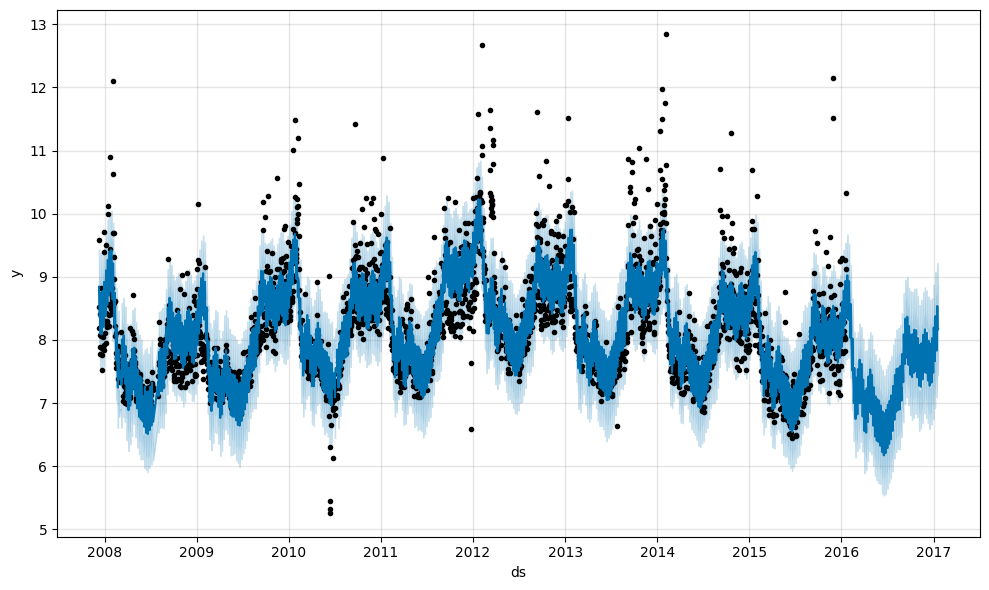

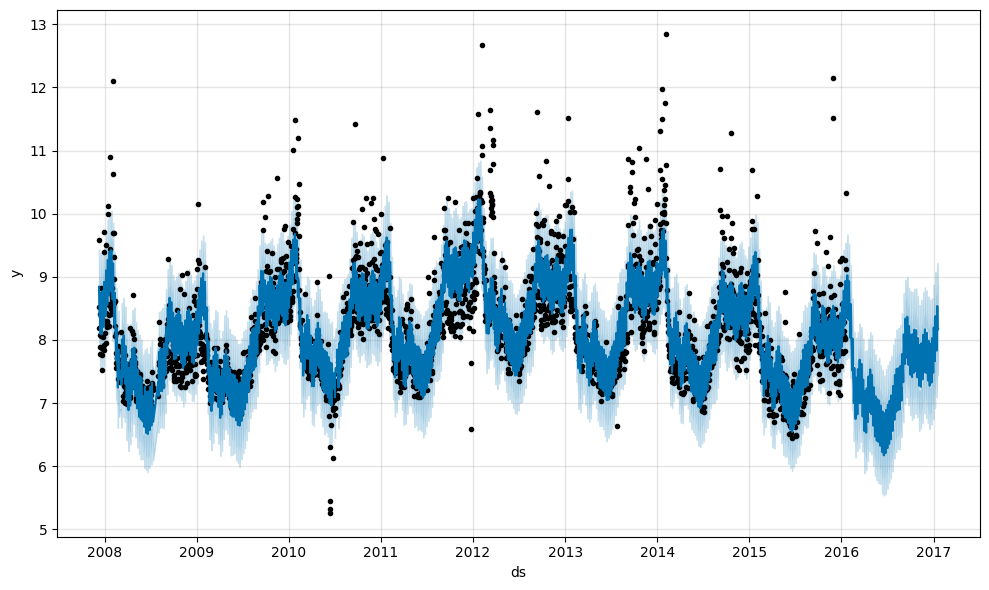

In [16]:
pred = model.predict(future_df)
model.plot(pred)

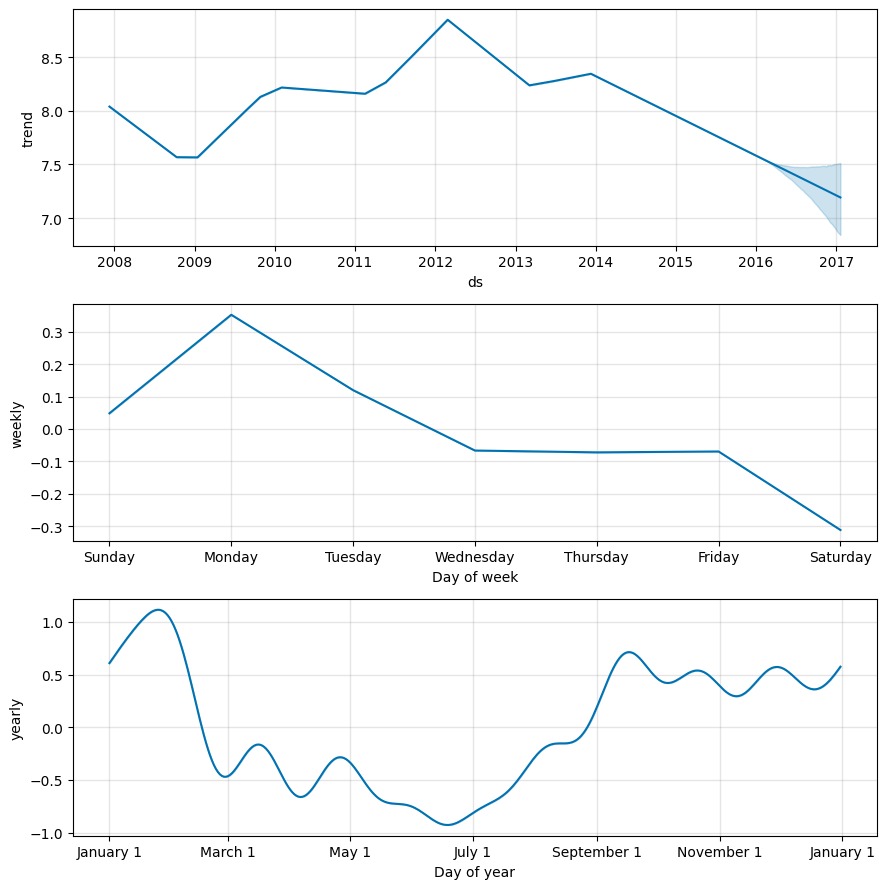

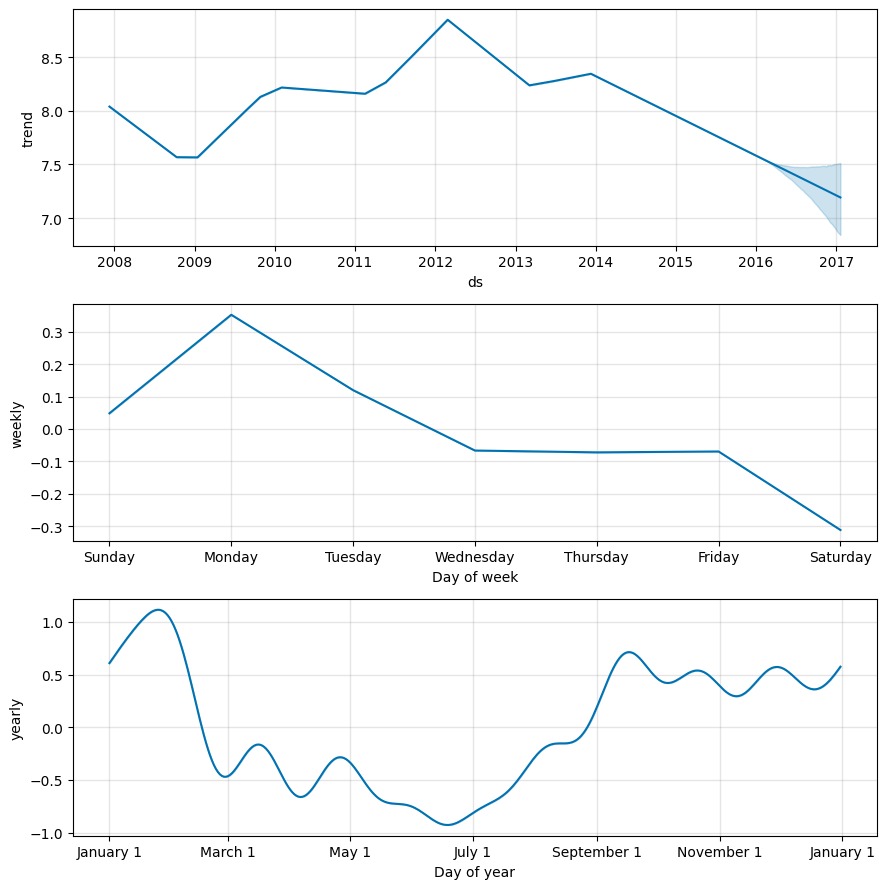

In [17]:
model.plot_components(pred)

In [33]:
pred
# dataset

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039867,8.229720,9.439836,8.039867,8.039867,0.802975,0.802975,0.802975,0.352288,0.352288,0.352288,0.450687,0.450687,0.450687,0.0,0.0,0.0,8.842842
1,2007-12-11,8.038324,7.936780,9.207865,8.038324,8.038324,0.553054,0.553054,0.553054,0.119624,0.119624,0.119624,0.433429,0.433429,0.433429,0.0,0.0,0.0,8.591378
2,2007-12-12,8.036781,7.760245,9.011901,8.036781,8.036781,0.350443,0.350443,0.350443,-0.066664,-0.066664,-0.066664,0.417107,0.417107,0.417107,0.0,0.0,0.0,8.387224
3,2007-12-13,8.035238,7.742061,8.962445,8.035238,8.035238,0.329903,0.329903,0.329903,-0.072261,-0.072261,-0.072261,0.402163,0.402163,0.402163,0.0,0.0,0.0,8.365141
4,2007-12-14,8.033695,7.755635,8.996037,8.033695,8.033695,0.319434,0.319434,0.319434,-0.069571,-0.069571,-0.069571,0.389005,0.389005,0.389005,0.0,0.0,0.0,8.353129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.195977,7.488072,8.930926,6.849612,7.511306,1.017930,1.017930,1.017930,0.048291,0.048291,0.048291,0.969639,0.969639,0.969639,0.0,0.0,0.0,8.213906
3266,2017-01-16,7.194960,7.857997,9.216034,6.847634,7.511622,1.343979,1.343979,1.343979,0.352288,0.352288,0.352288,0.991691,0.991691,0.991691,0.0,0.0,0.0,8.538940
3267,2017-01-17,7.193944,7.588648,9.039298,6.845752,7.511919,1.132426,1.132426,1.132426,0.119624,0.119624,0.119624,1.012802,1.012802,1.012802,0.0,0.0,0.0,8.326370
3268,2017-01-18,7.192928,7.441951,8.846963,6.843838,7.512215,0.966102,0.966102,0.966102,-0.066664,-0.066664,-0.066664,1.032767,1.032767,1.032767,0.0,0.0,0.0,8.159030


## Adding changepoint detection in Prophet

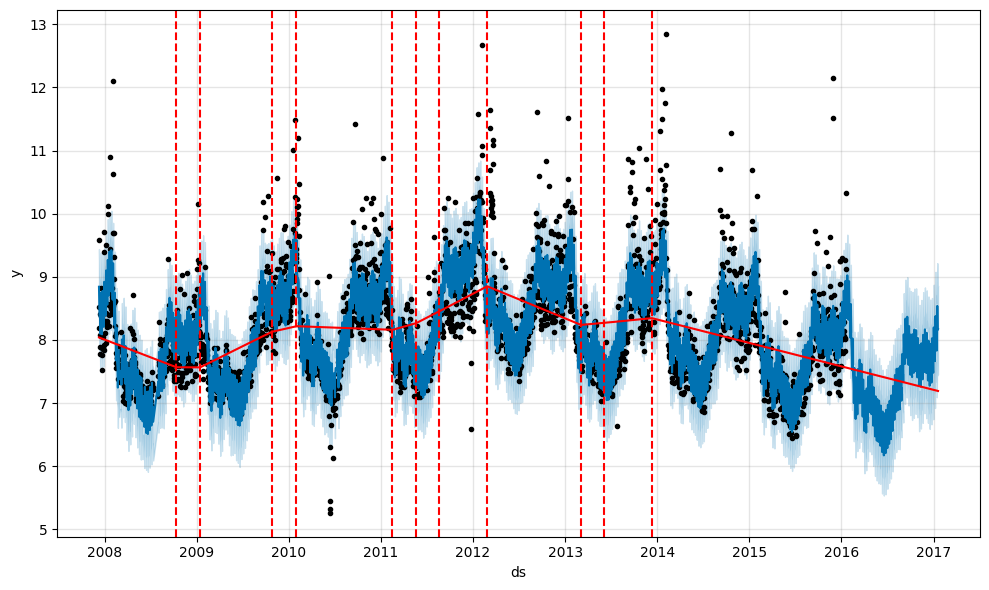

In [35]:
fig = model.plot(pred)
a = add_changepoints_to_plot(fig.gca(), model, pred)

In [36]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
playoff